In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1) High level statistics of the dataset: Number of points, number of features, number of classes, data-points per classes. <br>
2) Explain our objective <br>
3) Perform Univariate analysis (PDF, CDF, Boxplot, Violin plot) to understand which features are useful towards classification. <br>
4) Peform Bi-Variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classification. <br>
5) Write your observation in english as crisply and unambigously as possible. Always quantly your results

In [2]:
df = pd.read_excel("D:\Machine Learning - Course\Sample Data Sets\Sample - Superstore.xls")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

In [5]:
df.shape

(9994, 21)

## Checking Missing Values

In [6]:
df.isnull().sum()
#There are no null values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


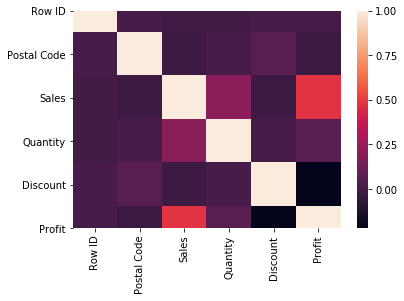

In [8]:
sns.heatmap(df.corr())

Above heatmap shows that there is not much relationship between any features of data. It can be say that all are Independent Variables. Increase in one variable do not tend to increase in another variable.
Only two set of features relate with each other as follows: <br>
1) Sales & Quantity - It tends to have a positive correlation of upto 20 % <br>
2) Sales & Profit - It tends to have a positive correlation of upto 47 %

In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


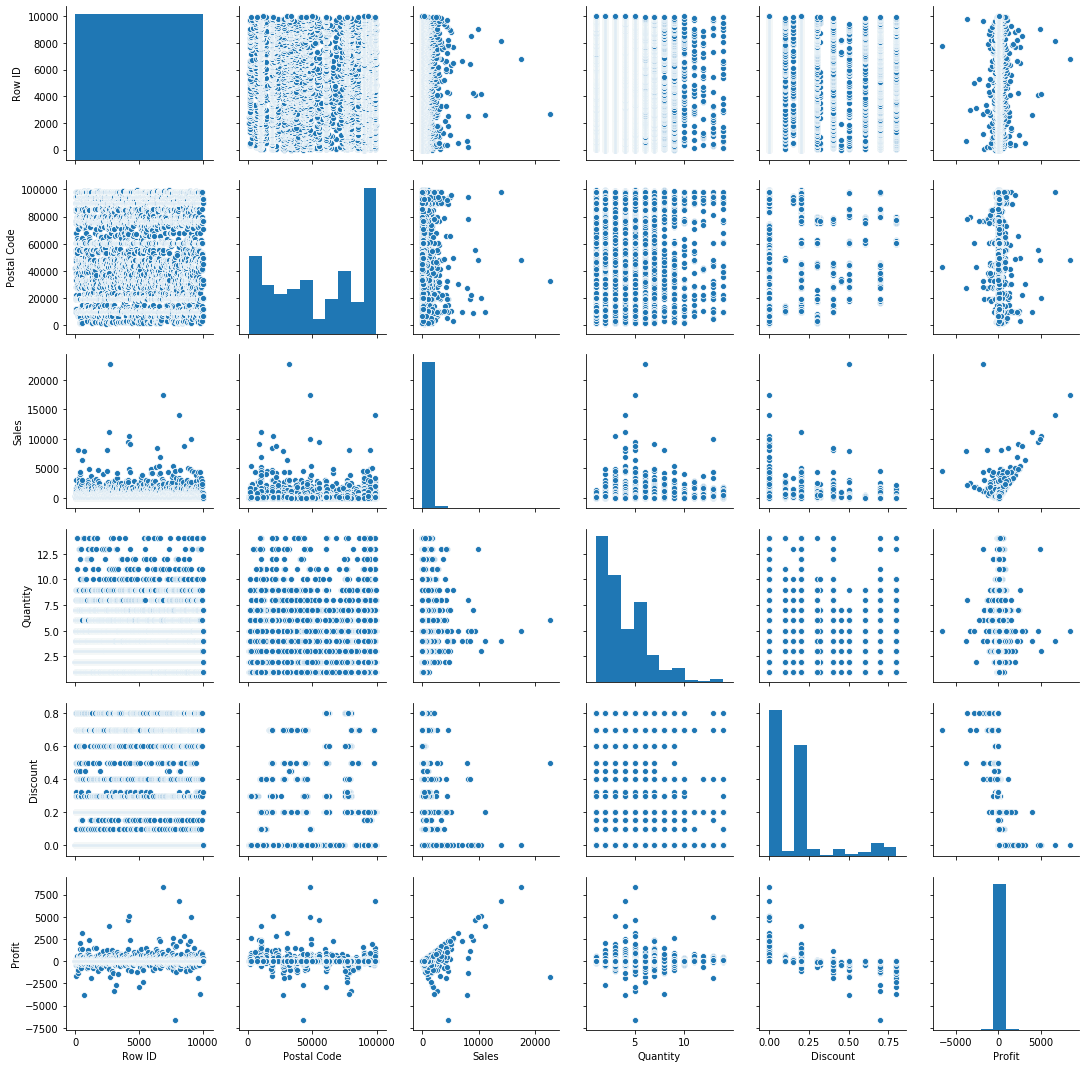

In [10]:
sns.pairplot(data=df)

# Bivariate Analysis 

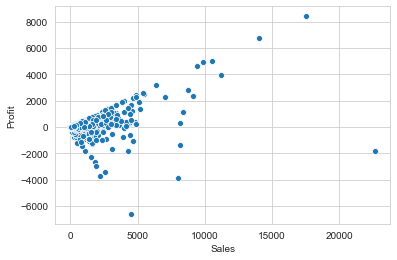

In [11]:
sns.set_style('whitegrid')
sns.scatterplot(x='Sales',y='Profit',data=df)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


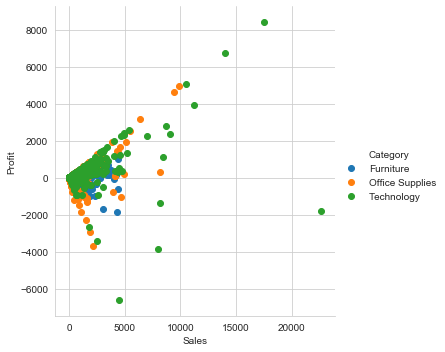

In [12]:
sns.set_style('whitegrid')
sns.FacetGrid(data=df,hue='Category',size=5).map(plt.scatter,'Sales','Profit').add_legend()
plt.show()

In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Univariate Analysis 

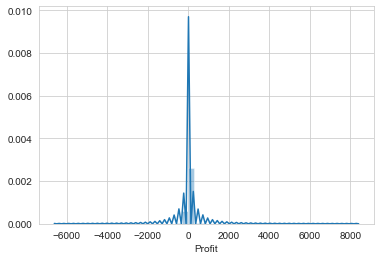

In [14]:
sns.distplot(df['Profit'])

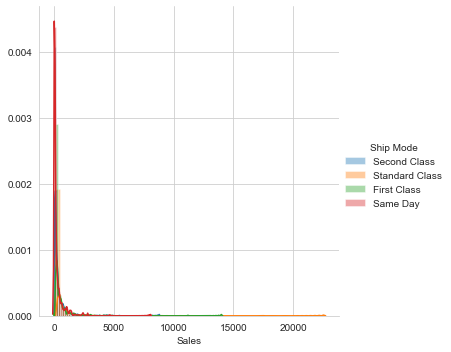

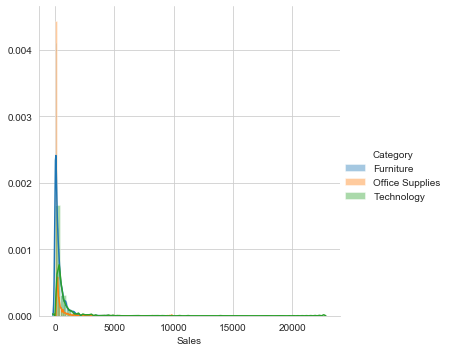

In [15]:
sns.set_style('whitegrid')
sns.FacetGrid(data=df,hue='Ship Mode',size=5).map(sns.distplot,'Sales').add_legend();
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(data=df,hue='Category',size=5).map(sns.distplot,'Sales').add_legend();
plt.show()

#It seems distribution of sales for each category related to each other.... They are almost equal.

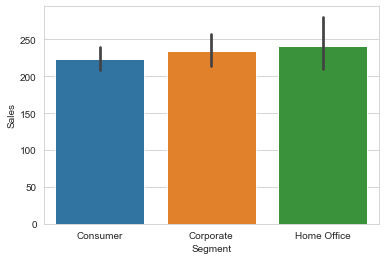

In [39]:
sns.barplot(x='Segment',y='Sales',data=df)

In [38]:
dd = df.groupby('Segment').sum()[['Sales','Profit']].sort_values('Sales').reset_index()
dd

,Segment,Sales,Profit
0,Consumer,223.733644,25.836873
1,Corporate,233.823300,30.456667
2,Home Office,240.972041,33.818664


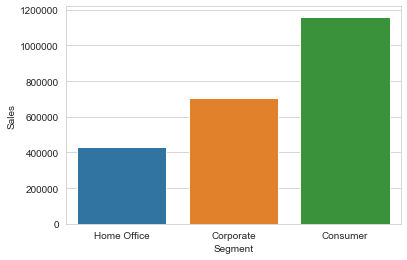

In [35]:
sns.barplot(x='Segment',y='Sales',data=dd)

It means that in each Segment Technology category products sales are higher follow by Furniture & Office Supplies

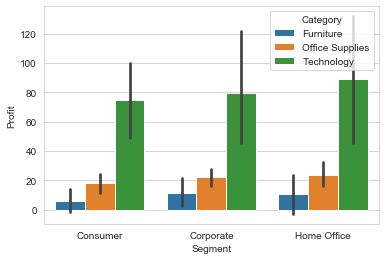

In [17]:
sns.barplot(x='Segment',y='Profit',data=df,hue='Category')

It means that in each Segment Technology category products Proft are higher follow by Furniture & Office Supplies

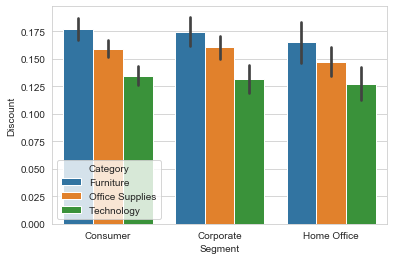

In [18]:
sns.barplot(x='Segment',y='Discount',data=df,hue='Category')

Even technology products are in lead in terms of Sales & Profit but they had a less amout in proportion to discount. That means technology product are the best in this data.

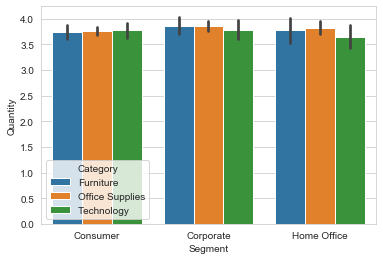

In [19]:
sns.barplot(x='Segment',y='Quantity',data=df,hue='Category')

In terms of quantity each category sold more or less equal quantity.

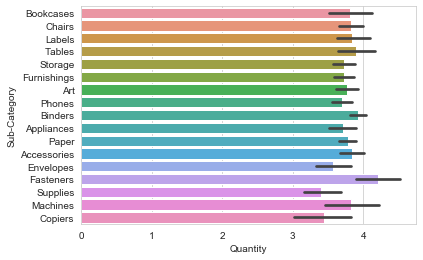

In [20]:
sns.barplot(x='Quantity',y='Sub-Category',data=df)

In [21]:
df['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Cedar Rapids       1
Layton             1
Pico Rivera        1
Romeoville         1
Normal             1
Name: City, Length: 531, dtype: int64

## Showing summary of Sales in line chart - City wise 

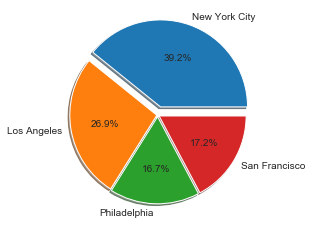

In [22]:
ny=df.loc[df['City']=='New York City'].sum()['Sales']
la=df.loc[df['City']=='Los Angeles'].sum()['Sales']
ph=df.loc[df['City']=='Philadelphia'].sum()['Sales']
sn=df.loc[df['City']=='San Francisco'].sum()['Sales']

sales=[ny,la,ph,sn]

city_lst = ['New York City','Los Angeles','Philadelphia','San Francisco']
plt.pie(x=sales,labels=city_lst,autopct='%1.1f%%',shadow=True,explode=(0.1,0.01,0.02,0.02))
plt.show()

In [23]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Showing Summary with Ship Mode 

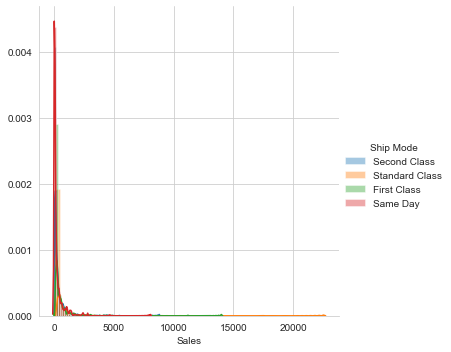

In [24]:
sns.FacetGrid(data=df,hue='Ship Mode',size=5).map(sns.distplot,'Sales').add_legend()